In [1]:
import numpy as np
from numpy import median
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999

# **Intro**
* This dataset is about energy status in germany from 2018-2022.
* To understand the dataset easily:
    * Watt(W): A unit of how much electricity is produced per unit time.
        * 1MW = 1,000kW = 1,000,000W
        
    <br>
    
    * What can you do with 1 MWh(megawatt-hour)?
        * Power the average American home for 1.2 months.
        * Drive an electric vehicle 3,600 miles.
        * Power two 60-watt lightbulbs non-stop for a year.
        * Smelt 137 pounds of aluminum.
        * Toast 89,000 slices of bread.
        * Run an average home pool pump for 5 months.
        * un two modern refrigerators for a year.
        
    <br>
        
    * **Meaning of Residual Load**
        * The residual load is what is left after subtracting those generators who have to produce electricity ("must run") and those that generate with (almost) no marginal costs (variable renewables like wind, solar and hydro).
        * In electrical power engineering, “residual load” refers to the demand for electrical power (the “load”) in a power grid after eliminating the share of fluctuating feed-in from supply-dependent generators such as wind farms and photovoltaic plants. The residual load thus represents the demand that must be met by the available, dispatchable power plants (such as storage power plants and thermal power plants). If the available power plant output is too low, the uncovered load quantities can lead to a (power) failure on the consumer side in extreme cases.




# **Inspiration**

* Figure out general energy status with % from each energy generation resources.
* Comparing each energy generation resources to find out a power generation.
* Find out the increase/decrease of each energy generation resources.


## **Load Data**

In [2]:
df = pd.read_csv("../input/germany-energy-day-ahead-2018-to-2022/Data_Actual.csv", low_memory=False, parse_dates=['Date_Time of day'])

In [3]:
df.head(3)

,Date_Time of day,Germany/Luxembourg[€/MWh],Day of Week,Total (grid load)[MWh],Residual load[MWh],Hydro pumped storage[MWh]_x,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Lignite[MWh],Hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh]_y,Other conventional[MWh]
0,2018-01-31 00:00:00,29.61,2,"13,770","9,754",261,"1,204",478.75,987,"3,030",0,58,"2,328","3,961","1,145","1,126",9,317
1,2018-01-31 01:00:00,28.98,2,"13,123","8,764",425,"1,201.5",480.50,"1,009","3,351",0,57,"2,336.75","3,913",995,"1,131",9,316
2,2018-01-31 02:00:00,27.24,2,"12,856","8,065",544,"1,198",470.25,"1,055","3,736",0,57,"2,309","3,843",922,"1,108",6,319


In [4]:
df.shape

(35084, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35084 entries, 0 to 35083
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date_Time of day             35084 non-null  datetime64[ns]
 1   Germany/Luxembourg[€/MWh]    35083 non-null  float64       
 2   Day of Week                  35084 non-null  int64         
 3   Total (grid load)[MWh]       35084 non-null  object        
 4   Residual load[MWh]           35084 non-null  object        
 5   Hydro pumped storage[MWh]_x  35084 non-null  object        
 6   Biomass[MWh]                 35084 non-null  object        
 7   Hydropower[MWh]              35084 non-null  float64       
 8   Wind offshore[MWh]           35084 non-null  object        
 9   Wind onshore[MWh]            35084 non-null  object        
 10  Photovoltaics[MWh]           35084 non-null  object        
 11  Other renewable[MWh]         35084 non-nu

## **Clean Data**

The dtype of colums should be numeric to be able to calculate. But some colums, because of comma, are not numeric. So we should convert them to numeric.

In [6]:
col_list = list(df.columns[1:])
col_list

['Germany/Luxembourg[€/MWh]',
 'Day of Week',
 'Total (grid load)[MWh]',
 'Residual load[MWh]',
 'Hydro pumped storage[MWh]_x',
 'Biomass[MWh]',
 'Hydropower[MWh]',
 'Wind offshore[MWh]',
 'Wind onshore[MWh]',
 'Photovoltaics[MWh]',
 'Other renewable[MWh]',
 'Nuclear[MWh]',
 'Lignite[MWh]',
 'Hard coal[MWh]',
 'Fossil gas[MWh]',
 'Hydro pumped storage[MWh]_y',
 'Other conventional[MWh]']

In [7]:
# Convert ',' to ''
for column in col_list:
    if df[column].dtype == "object":
        df[column] = df[column].apply(lambda v: v.replace(',',''))

In [8]:
# Convert dtype to numeric 
for column in col_list:
    if df[column].dtype == "object":
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35084 entries, 0 to 35083
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date_Time of day             35084 non-null  datetime64[ns]
 1   Germany/Luxembourg[€/MWh]    35083 non-null  float64       
 2   Day of Week                  35084 non-null  int64         
 3   Total (grid load)[MWh]       35084 non-null  int64         
 4   Residual load[MWh]           35084 non-null  int64         
 5   Hydro pumped storage[MWh]_x  35084 non-null  int64         
 6   Biomass[MWh]                 35084 non-null  float64       
 7   Hydropower[MWh]              35084 non-null  float64       
 8   Wind offshore[MWh]           35084 non-null  int64         
 9   Wind onshore[MWh]            35084 non-null  int64         
 10  Photovoltaics[MWh]           35084 non-null  int64         
 11  Other renewable[MWh]         35084 non-nu

In [10]:
df.head()

,Date_Time of day,Germany/Luxembourg[€/MWh],Day of Week,Total (grid load)[MWh],Residual load[MWh],Hydro pumped storage[MWh]_x,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Lignite[MWh],Hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh]_y,Other conventional[MWh]
0,2018-01-31 00:00:00,29.61,2,13770,9754,261,"1,204.00",478.75,987,3030,0,58,"2,328.00","3,961.00",1145,1126,9,317
1,2018-01-31 01:00:00,28.98,2,13123,8764,425,"1,201.50",480.50,1009,3351,0,57,"2,336.75","3,913.00",995,1131,9,316
2,2018-01-31 02:00:00,27.24,2,12856,8065,544,"1,198.00",470.25,1055,3736,0,57,"2,309.00","3,843.00",922,1108,6,319
3,2018-01-31 03:00:00,17.97,2,12911,7477,797,"1,199.25",468.75,1064,4370,0,57,"2,313.75","3,635.00",915,1101,4,318
4,2018-01-31 04:00:00,19.53,2,13227,7316,871,"1,195.50",464.00,1061,4851,0,57,"2,291.25","3,457.00",928,1116,2,313


In [11]:
df.describe()

,Germany/Luxembourg[€/MWh],Day of Week,Total (grid load)[MWh],Residual load[MWh],Hydro pumped storage[MWh]_x,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Lignite[MWh],Hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh]_y,Other conventional[MWh]
count,"35,083.00","35,084.00","35,084.00","35,084.00","35,084.00","35,084.00","35,084.00","35,084.00","35,084.00","35,084.00","35,084.00","35,084.00","35,084.00","35,084.00","35,084.00","35,084.00","35,084.00"
mean,55.27,3.11,"14,219.95","9,559.94",309.58,"1,143.78",435.27,680.23,"2,726.60","1,253.49",43.74,"1,892.77","2,925.73","1,478.93","1,499.73",293.30,352.78
std,51.31,2.07,"2,471.94","3,076.53",351.12,61.56,92.44,467.09,"2,170.12","1,921.47",8.05,308.45,926.41,987.67,673.28,342.67,98.57
min,-90.01,0.00,"8,324.00",716.00,0.00,929.00,210.00,0.00,25.00,0.00,28.00,665.00,715.00,182.00,214.00,0.00,97.00
25%,31.50,1.00,"12,186.00","7,514.00",22.00,"1,098.00",362.00,250.00,"1,059.00",0.00,37.00,"1,659.00","2,321.00",623.00,935.00,49.00,307.00
50%,43.30,3.00,"14,149.00","9,659.00",158.00,"1,143.00",428.75,636.00,"2,076.00",21.00,42.00,"1,944.00","3,087.00","1,223.00","1,414.00",140.00,361.00
75%,59.08,5.00,"16,320.00","11,700.25",519.00,"1,200.00",508.25,"1,069.00","3,838.00","2,029.00",51.00,"2,035.00","3,696.00","2,158.00","1,960.00",438.00,391.00
max,620.00,7.00,"20,445.00","18,558.00","1,636.00","1,264.00",670.75,"1,804.00","10,558.00","9,096.00",62.00,"2,382.00","4,606.00","4,351.00","3,756.00","2,058.00","1,739.00"


# **Exploring**

### **1. Figure out general energy status with % from each energy generation resources.**

In [12]:
e_total = df.columns[3:5]
df[e_total].mean()

Total (grid load)[MWh]   14,219.95
Residual load[MWh]        9,559.94
dtype: float64

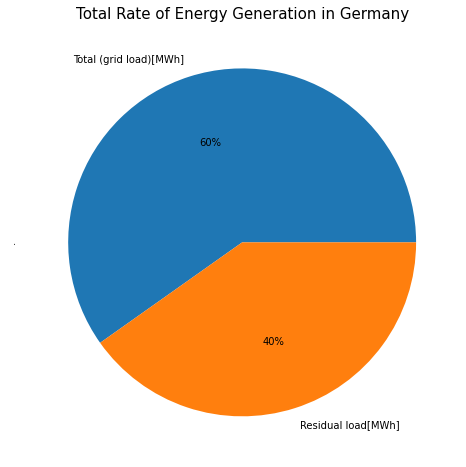

In [13]:
df[e_total].mean().plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(10,8))

plt.title("Total Rate of Energy Generation in Germany", size=15)
plt.ylabel('.')

plt.show()

This shows that around 40% of energy will be generated by dispatchable fuel resources plants (such as nuclear, lignite, coal). And the other 60% of energy by renewable & other.

**First, let's start with Residual Load (40% from totla rate of energy generation).**

In [14]:
e_dis_list = df.columns[12:15]
df[e_dis_list].mean()

Nuclear[MWh]     1,892.77
Lignite[MWh]     2,925.73
Hard coal[MWh]   1,478.93
dtype: float64

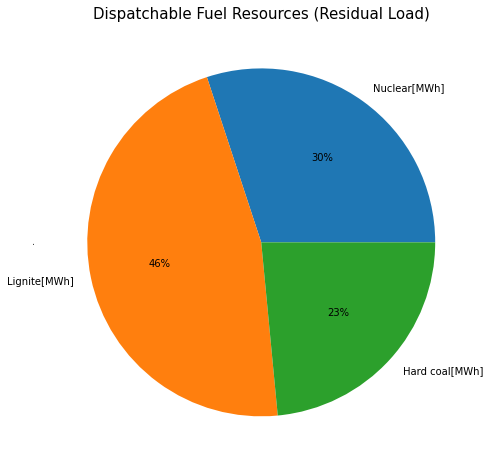

In [15]:
df[e_dis_list].mean().plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(10,8))

plt.title("Dispatchable Fuel Resources (Residual Load)", size=15)
plt.ylabel('.')

plt.show()

**Second, with renewable & other energy sources (60% from total rate of energy generation).**

In [16]:
e_60 = list(df.columns[5:12]) + list(df.columns[15:])
df[e_60].mean()

Hydro pumped storage[MWh]_x     309.58
Biomass[MWh]                  1,143.78
Hydropower[MWh]                 435.27
Wind offshore[MWh]              680.23
Wind onshore[MWh]             2,726.60
Photovoltaics[MWh]            1,253.49
Other renewable[MWh]             43.74
Fossil gas[MWh]               1,499.73
Hydro pumped storage[MWh]_y     293.30
Other conventional[MWh]         352.78
dtype: float64

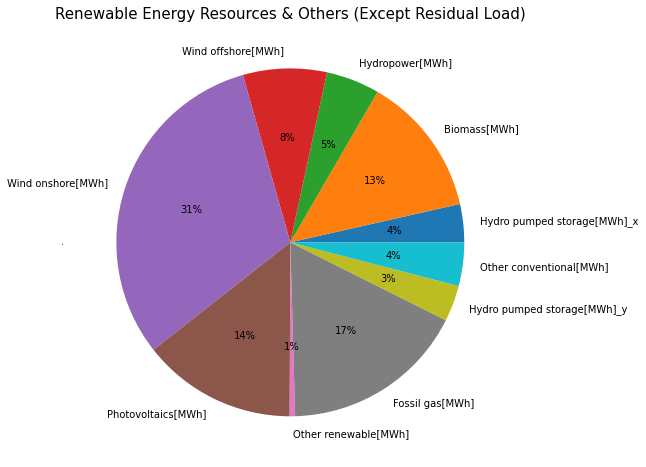

In [17]:
df[e_60].mean().plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(10,8))

plt.title("Renewable Energy Resources & Others (Except Residual Load)", size=15)
plt.ylabel('.')

plt.show()

It is noticeable that fossil gas has 17%, which is quite a lot.

**Then now, let's check out only renewable energy resources.**

In [18]:
e_renewable = list(df.columns[5:12])
e_renewable.append(df.columns[-2])
df[e_renewable].mean()

Hydro pumped storage[MWh]_x     309.58
Biomass[MWh]                  1,143.78
Hydropower[MWh]                 435.27
Wind offshore[MWh]              680.23
Wind onshore[MWh]             2,726.60
Photovoltaics[MWh]            1,253.49
Other renewable[MWh]             43.74
Hydro pumped storage[MWh]_y     293.30
dtype: float64

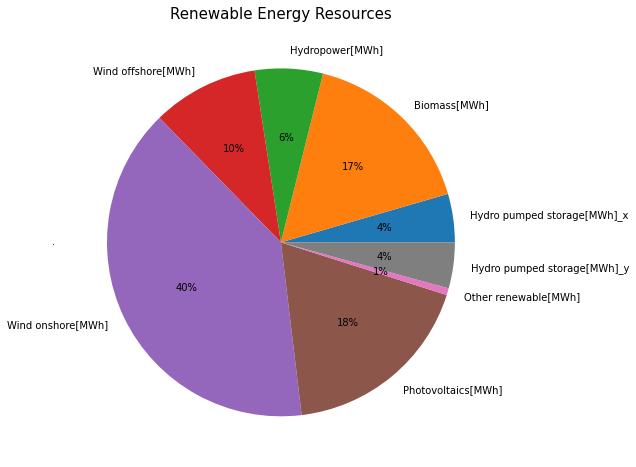

In [19]:
df[e_renewable].mean().plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(10,8))

plt.title("Renewable Energy Resources", size=15)
plt.ylabel('.')

plt.show()

It is interesting that the wind power has 50% from entire rate of renewable energy sources.

**For the last, we compare all energy resources.**

In [20]:
e_list = df.columns[5:]

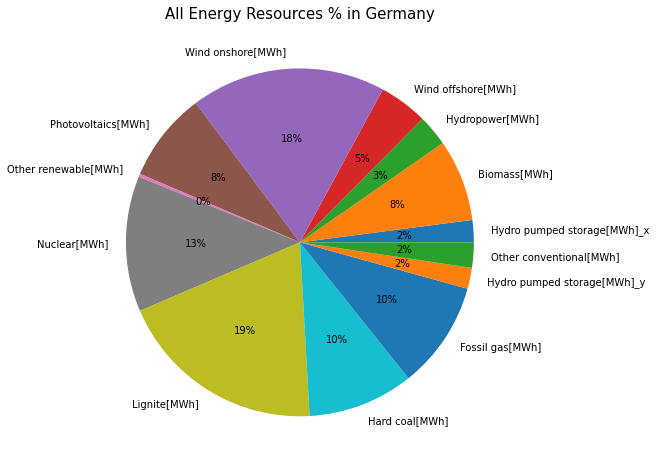

In [21]:
df[e_list].mean().plot(
    kind='pie', autopct='%1.0f%%', subplots=True, figsize=(10, 8))

plt.title("All Energy Resources % in Germany", size=15)
plt.ylabel('.')

plt.show()

### **2. Find out the increase/decrease of each energy generation resources.**

Since the dataset has not the data about 2022 in full, we are not going to use the data from 2022.

In [22]:
year = df['Date_Time of day'].dt.year != 2022
new_df = df[year]
y = new_df['Date_Time of day'].dt.year

In [23]:
total = df.groupby(y)['Total (grid load)[MWh]'].mean()

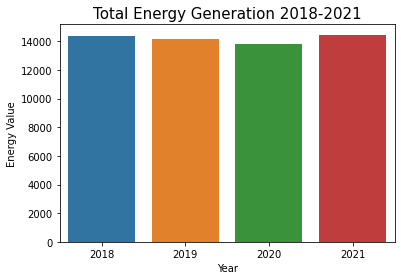

In [24]:
sns.barplot(data=df, x=total.index.astype(int), y=total)

plt.title('Total Energy Generation 2018-2021', size=15)
plt.xlabel("Year")
plt.ylabel("Energy Value")

plt.show()

When it comes to total energy generation, it seems like that there is not noticeable gap for last 4 years.

#### **1. Dispatchable fuel resources (Residual Load)**

In [25]:
lig = df.groupby(y)['Lignite[MWh]'].mean()

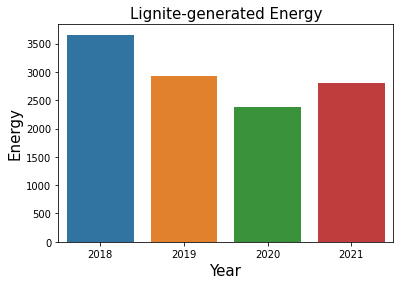

In [26]:
sns.barplot(data=df, x=lig.index.astype(int), y=lig)

plt.title("Lignite-generated Energy", size=15)
plt.xlabel("Year", size=15)
plt.ylabel("Energy",size=15)
plt.show()

In [27]:
nuclear = df.groupby(y)['Nuclear[MWh]'].mean()

In [28]:
coal = df.groupby(y)['Hard coal[MWh]'].mean()

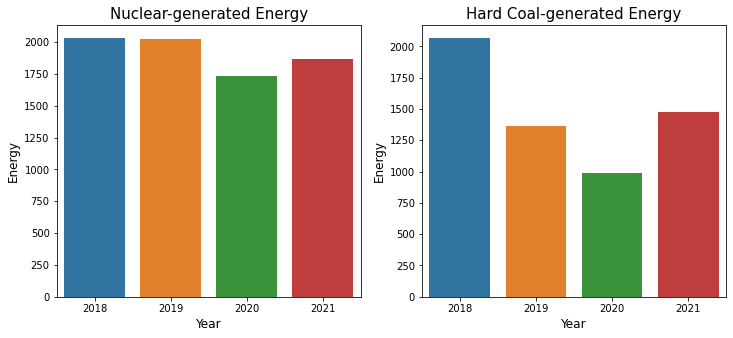

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(data=df, x=nuclear.index.astype(int), y=nuclear, ax=ax[0])
ax[0].set_title("Nuclear-generated Energy", size=15)
ax[0].set_xlabel("Year", size=12)
ax[0].set_ylabel("Energy",size=12)

sns.barplot(data=df, x=coal.index.astype(int), y=coal, ax=ax[1])
ax[1].set_title("Hard Coal-generated Energy", size=15)
ax[1].set_xlabel("Year", size=12)
ax[1].set_ylabel("Energy",size=12)

plt.show()

#### **2. Renewable Soruces**

In [30]:
wind_off = df.groupby(y)['Wind offshore[MWh]'].mean()
wind_on = df.groupby(y)['Wind onshore[MWh]'].mean()

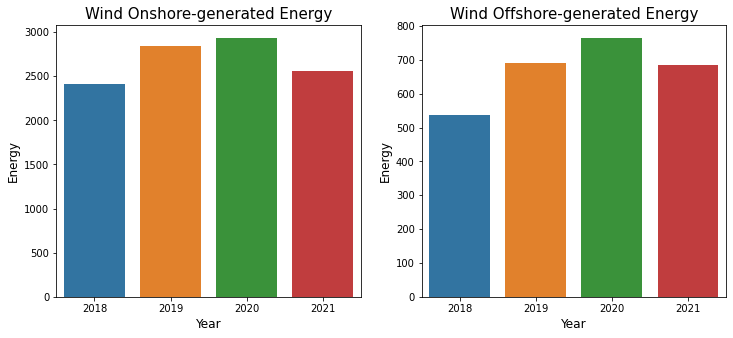

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(data=df, x=wind_on.index.astype(int), y=wind_on, ax=ax[0])
ax[0].set_title("Wind Onshore-generated Energy", size=15)
ax[0].set_xlabel("Year", size=12)
ax[0].set_ylabel("Energy",size=12)


sns.barplot(data=df, x=wind_off.index.astype(int), y=wind_off, ax=ax[1])
ax[1].set_title("Wind Offshore-generated Energy", size=15)
ax[1].set_xlabel("Year", size=12)
ax[1].set_ylabel("Energy",size=12)

plt.show()

The huge gap between on and off -shore is noticeable.

In [32]:
bio = df.groupby(y)['Biomass[MWh]'].mean()
hyd = df.groupby(y)['Hydropower[MWh]'].mean()

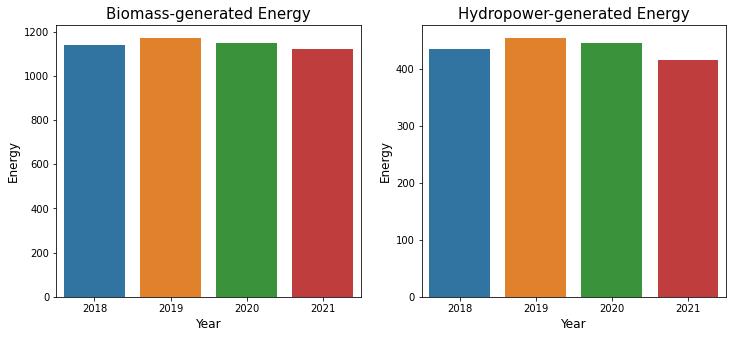

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=df, x=bio.index.astype(int), y=bio, ax=ax[0])
ax[0].set_title("Biomass-generated Energy", size=15)
ax[0].set_xlabel("Year", size=12)
ax[0].set_ylabel("Energy",size=12)


sns.barplot(data=df, x=hyd.index.astype(int), y=hyd, ax=ax[1])
ax[1].set_title("Hydropower-generated Energy", size=15)
ax[1].set_xlabel("Year", size=12)
ax[1].set_ylabel("Energy",size=12)

plt.show()

In [34]:
hyd_x = df.groupby(y)['Hydro pumped storage[MWh]_x'].mean()
hyd_y = df.groupby(y)['Hydro pumped storage[MWh]_y'].mean()

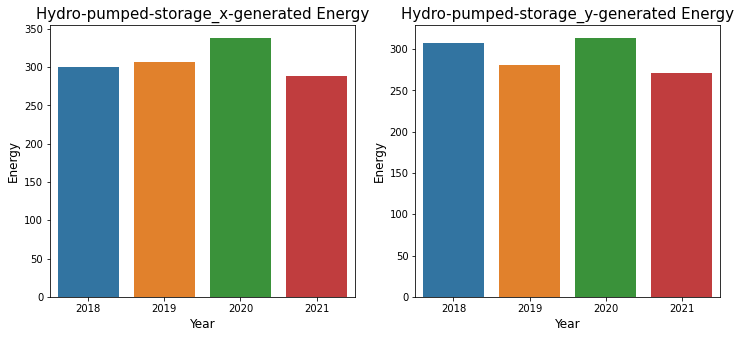

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=df, x=hyd_x.index.astype(int), y=hyd_x, ax=ax[0])
ax[0].set_title("Hydro-pumped-storage_x-generated Energy", size=15)
ax[0].set_xlabel("Year", size=12)
ax[0].set_ylabel("Energy",size=12)


sns.barplot(data=df, x=hyd_y.index.astype(int), y=hyd_y, ax=ax[1])
ax[1].set_title("Hydro-pumped-storage_y-generated Energy", size=15)
ax[1].set_xlabel("Year", size=12)
ax[1].set_ylabel("Energy",size=12)

plt.show()

In [36]:
solar = df.groupby(y)['Photovoltaics[MWh]'].mean()
other = df.groupby(y)['Other renewable[MWh]'].mean()

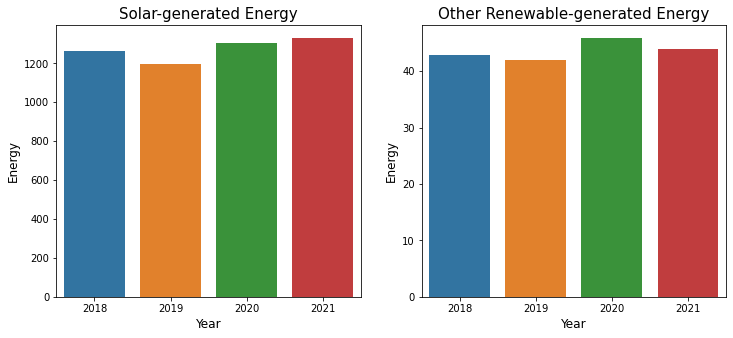

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=df, x=solar.index.astype(int), y=solar, ax=ax[0])
ax[0].set_title("Solar-generated Energy", size=15)
ax[0].set_xlabel("Year", size=12)
ax[0].set_ylabel("Energy",size=12)


sns.barplot(data=df, x=other.index.astype(int), y=other, ax=ax[1])
ax[1].set_title("Other Renewable-generated Energy", size=15)
ax[1].set_xlabel("Year", size=12)
ax[1].set_ylabel("Energy",size=12)

plt.show()

#### **3. Other Resources**

In [38]:
fossil = df.groupby(y)['Fossil gas[MWh]'].mean()
other_c = df.groupby(y)['Other conventional[MWh]'].mean()

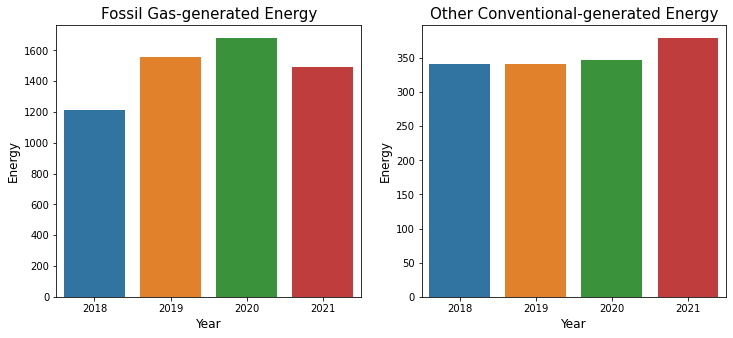

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=df, x=fossil.index.astype(int), y=fossil, ax=ax[0])
ax[0].set_title("Fossil Gas-generated Energy", size=15)
ax[0].set_xlabel("Year", size=12)
ax[0].set_ylabel("Energy",size=12)


sns.barplot(data=df, x=other_c.index.astype(int), y=other_c, ax=ax[1])
ax[1].set_title("Other Conventional-generated Energy", size=15)
ax[1].set_xlabel("Year", size=12)
ax[1].set_ylabel("Energy",size=12)

plt.show()

# **Conclusion**

* **1. Figure out general energy status with % from each energy generation resources.**
    * **Total Energy (100%) status in Germany** 
        * Renewable Energy (50%)
        * Dispatchable Fuel Resources (40%)
        * Other (10%) (Fossile gas, etc)
        
        <br>
        
    * **Renewable Energy**
        * Wind (50%)
        * Solar (18%)
        * Biomass (17%)
        * Hydro (14%)
        * Other (1%)
        
        <br>
        
    * **Dispatchable Fuel Resources**
        * Lignite (46%)
        * Nuclear (30%)
        * Hard coal (23%)
        
        <br>
        
        
* **2. Find out the increase/decrease of each energy generation resources.**
    * This dataset shows clearly that the generation of dispatchable fuel resources (such as nuclear, coal) are decreased, while the generation of energy with renewable resources are increased. This makes sense, since the goverment of germany offcially announced that they are planning to increase the energy-generation-rate of renewable resources, while they phase out all dispatchable fuel resources till 2030.
        
